In [ ]:
Sys.setlocale("LC_COLLATE", "ko_KR.UTF-8");
#한글이 깨지는 현상을 방지하기 위해서 showtext 라는 패키지를 이용하여 한글 글꼴을 추가한다.
install.packages('showtext', repos='http://cran.rstudio.com/')

#패키지를 올리고(?)
library(showtext)

#바로 이렇게 구글폰트를 다운 받습니다.
font_add_google('Noto Sans KR', 'notosanskr')

# 다운 받을 폰트 이름 : Noto Sans KR, 내가 사용할 이름 : notosanskr

font_add_google('Gugi', 'gugi')

showtext_auto()


Warning message in Sys.setlocale("LC_COLLATE", "ko_KR.UTF-8"):
“OS reports request to set locale to "ko_KR.UTF-8" cannot be honored”


[1] ""

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: sysfonts

Loading required package: showtextdb



In [ ]:
# 치킨집이 가장 많은 지역 찾기  
# 그림의 크기로 많은 지역을 표현
# 치킨집 데이터 구하기 
# www.localdata.kr

In [ ]:
# 데이터 읽어오기
library("readxl")

In [ ]:
#파일 읽어와서 ck변수에 저장
ck  <- read_excel("치킨집_가공.xlsx")

In [ ]:
head(ck)

소재지전체주소,사업장명
<chr>,<chr>
서울특별시 서대문구 창천동 52-20번지 2층,쪼리375
서울특별시 서대문구 창천동 53-83번지 (지상1층),고향
서울특별시 서대문구 창천동 53-3번지 2층,"찬수씨, 싼술을부탁해"
서울특별시 서대문구 남가좌동 377번지 삼성아파트 상가동 101호,케리홈치킨
서울특별시 서대문구 연희동 134-28번지 지하1층,연희38애비뉴
서울특별시 서대문구 창천동 62-53번지 1층 일부,닭꼬치야


In [ ]:
# 동별로 추출하여 상세 주소는 제거 substr()를 사용하여 동까지만 남기고 나머지 삭제
addr <- substr(ck$`소재지전체주소`,11,16)  # substr(데이터, 시작, 끝)

In [ ]:
head(addr)

[1] " 창천동 5"  " 창천동 5"  " 창천동 5"  " 남가좌동 " " 연희동 1" 
[6] " 창천동 6"

In [ ]:
# 숫자 모두 삭제.
# gsub() 함수를 사용하여 제거 

addr_num <- gsub("[0-9]","", addr)  #gsub(찾을값, 바꿀값, 어디에)

In [ ]:
head(addr_num)

[1] " 창천동 "   " 창천동 "   " 창천동 "   " 남가좌동 " " 연희동 "  
[6] " 창천동 "

In [ ]:
# 여백 모두 삭제
# gsub() 함수를 사용하여 제거 
addr_trim <- gsub(" ","",addr_num)

In [ ]:
head(addr_trim)

[1] "창천동"   "창천동"   "창천동"   "남가좌동" "연희동"   "창천동"

In [ ]:
# 동별 업소 개수 확인하기 
# 변수의 개수 확인을 위해 table()함수 사용
library(dplyr)
addr_count <- addr_trim %>% table() %>% data.frame()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
head(addr_count)

,.,Freq
,<fct>,<int>
1,남가좌동,282
2,냉천동,24
3,대신동,3
4,대현동,69
5,미근동,6
6,북가좌동,155


In [ ]:
addr_count


.,Freq
<fct>,<int>
남가좌동,282
냉천동,24
대신동,3
대현동,69
미근동,6
북가좌동,155
북아현동,45
신촌동,2
연희동,104


In [ ]:
install.packages("treemap")
library(treemap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



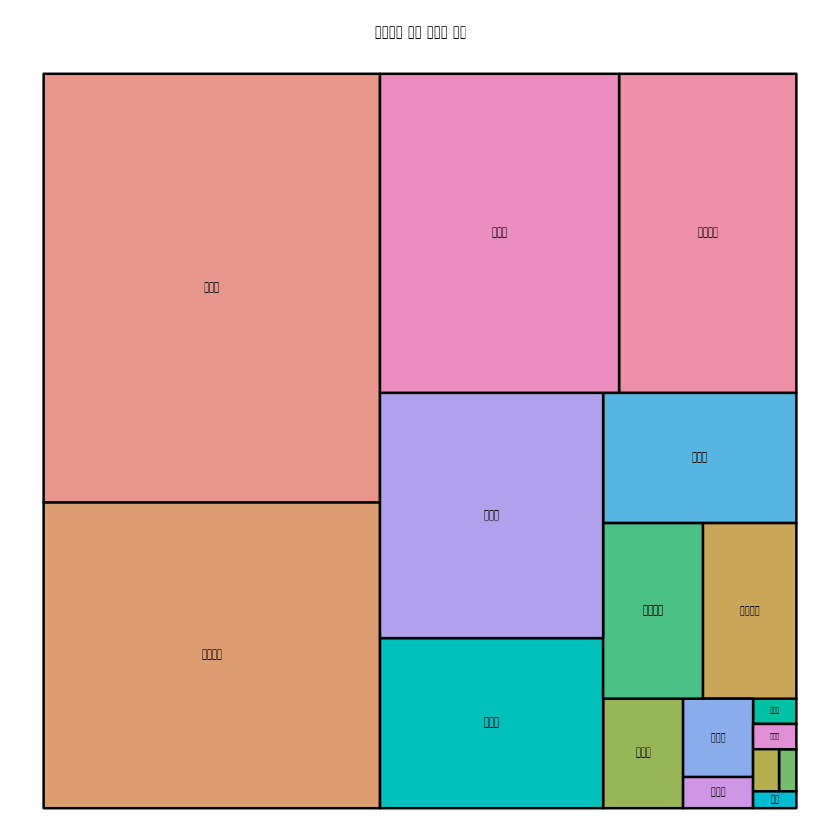

In [ ]:
treemap(addr_count, index = ".", vSize="Freq", title = "서대문구 동별 치킨집 분포")
